In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df =pd.read_parquet(r"C:\Users\simon\OneDrive\Desktop\Datathon25\merged_df.parquet")
df

,service_time_start,service_time_end,service_time_in_minutes,order_datetime,web_order_id,driver_id,trip_id,customer_id_x,warehouse_id,order_time,has_elevator,floor,is_pre_order,is_business,customer_id_y,distinct_box_id_count,article_count,total_weight,experience,stop_nr
19625,2024-11-01 08:38:16+01:00,2024-11-01 08:43:57+01:00,5.683333,2024-11-01 08:30:00+01:00,80,6442,1,522059,15,2024-11-01 08:30:00+01:00,False,2.0,True,False,522059,0,3,39790,605,1.0
19626,2024-11-01 09:24:42+01:00,2024-11-01 09:25:53+01:00,1.183333,2024-11-01 08:30:00+01:00,87,6442,1,215044,15,2024-11-01 08:30:00+01:00,False,0.0,True,True,215044,0,11,144390,605,2.0
19628,2024-11-01 09:39:53+01:00,2024-11-01 09:44:07+01:00,4.233333,2024-11-01 08:45:00+01:00,268,6442,1,413115,15,2024-11-01 08:45:00+01:00,False,0.0,True,False,413115,2,12,49134,605,3.0
19638,2024-11-01 09:59:06+01:00,2024-11-01 10:12:50+01:00,13.733333,2024-11-01 08:45:00+01:00,6604,6442,1,60321,15,2024-11-01 08:45:00+01:00,False,3.0,True,False,60321,0,7,112400,605,4.0
19630,2024-11-01 10:16:04+01:00,2024-11-01 10:26:13+01:00,10.150000,2024-11-01 09:45:00+01:00,899,6442,1,278977,15,2024-11-01 09:45:00+01:00,True,3.0,True,False,278977,0,6,90600,605,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934649,2025-01-30 09:56:18+01:00,2025-01-30 10:07:31+01:00,11.216666,2025-01-30 09:15:00+01:00,1534667,1599,250429,645481,42,2025-01-30 09:15:00+01:00,True,6.0,True,False,645481,0,2,31410,192,1.0
1279812,2025-01-30 09:57:23+01:00,2025-01-30 10:01:13+01:00,3.833333,2025-01-30 09:00:00+01:00,1529985,9174,250430,259650,26,2025-01-30 09:00:00+01:00,True,2.0,True,True,259650,0,12,188888,383,1.0
1408043,2025-01-30 09:59:50+01:00,2025-01-30 10:07:27+01:00,7.616666,2025-01-30 08:47:31.837000+01:00,1534833,10925,250431,365722,17,2025-01-30 08:47:31.837000+01:00,True,1.0,False,False,365722,1,3,33738,32,1.0
1408044,2025-01-30 10:12:55+01:00,2025-01-30 10:23:47+01:00,10.866666,2025-01-30 08:58:08.230000+01:00,1534834,10925,250431,423647,17,2025-01-30 08:58:08.230000+01:00,True,5.0,False,False,423647,2,16,34769,32,1.0


In [ ]:
# Group by customer_id_x and count the number of orders
customer_order_counts = df.groupby('customer_id_x').size().reset_index(name='order_count')

# Display the result
customer_order_counts

,customer_id_x,order_count
0,1,4
1,2,2
2,3,2
3,4,4
4,6,1
...,...,...
595465,645482,1
595466,645483,1
595467,645484,1
595468,645485,1


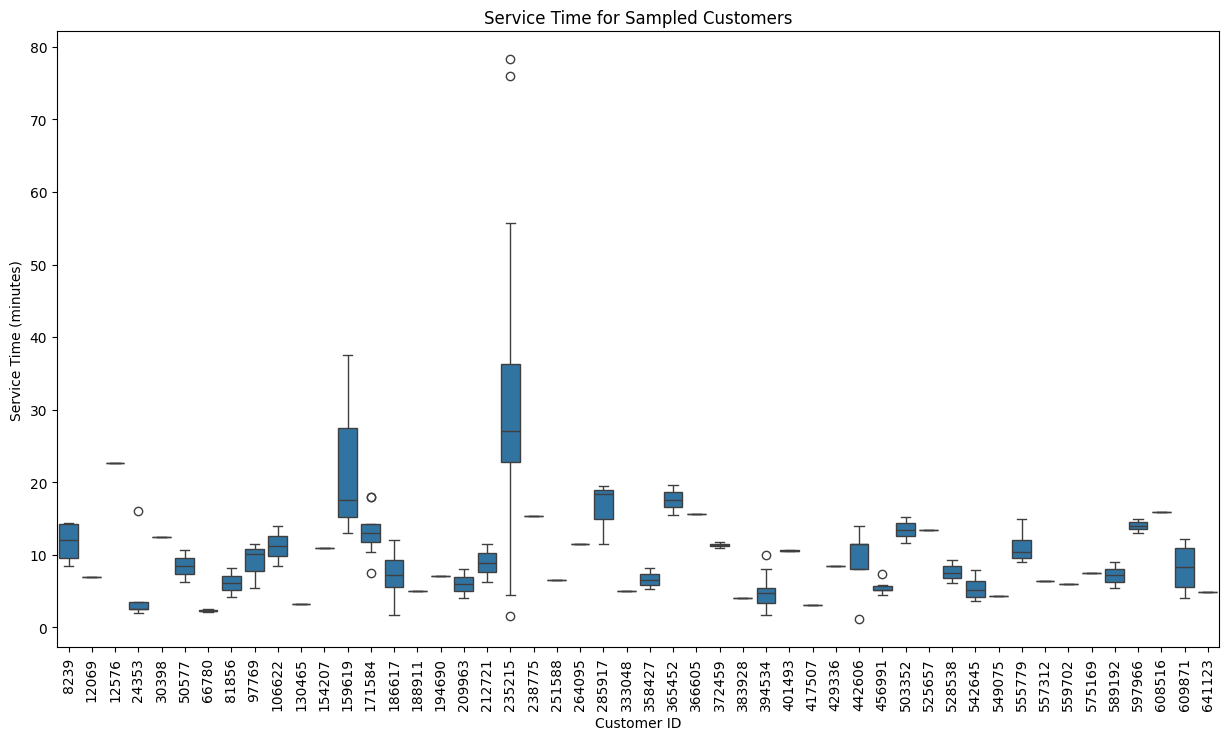

In [24]:
# Sample 50 customers from the customer_order_counts table
sampled_customers = customer_order_counts.sample(n=50, random_state=42)

# Merge with the original dataframe to get service time data
merged_sampled_df = pd.merge(sampled_customers, df, on='customer_id_x')

# Plotting
plt.figure(figsize=(15, 8))
sns.boxplot(x='customer_id_x', y='service_time_in_minutes', data=merged_sampled_df)
plt.title('Service Time for Sampled Customers')
plt.xlabel('Customer ID')
plt.ylabel('Service Time (minutes)')
plt.xticks(rotation=90)
plt.show()

In [52]:
# Filter customers with 3 or more orders
filtered_customers = customer_order_counts[customer_order_counts['order_count'] >= 3]

# Display the result
filtered_customers.head(30)

,customer_id_x,order_count
0,1,4
3,4,4
6,8,3
10,17,3
12,20,3
18,27,12
20,30,3
26,40,4
28,42,3
31,47,3


In [50]:
# Filter customers with 3 or more orders
filtered_customers1 = customer_order_counts[customer_order_counts['order_count'] >=4]

# Display the result
filtered_customers1

,customer_id_x,order_count
0,1,4
3,4,4
18,27,12
26,40,4
35,52,4
...,...,...
590556,640564,4
591445,641454,4
591532,641542,4
592236,642249,4


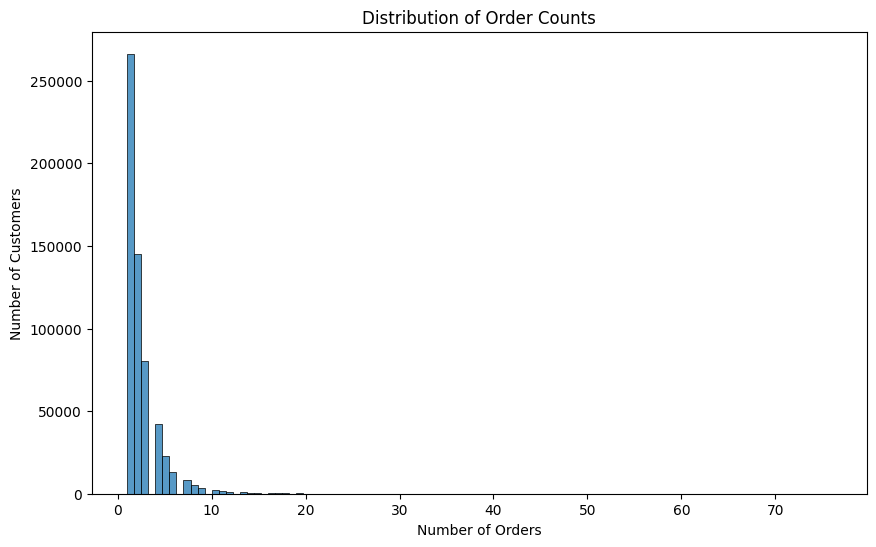

In [32]:
# Plot the distribution of order counts with a KDE line
plt.figure(figsize=(10, 6))
sns.histplot(customer_order_counts['order_count'], kde=False, bins=100)
plt.title('Distribution of Order Counts')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

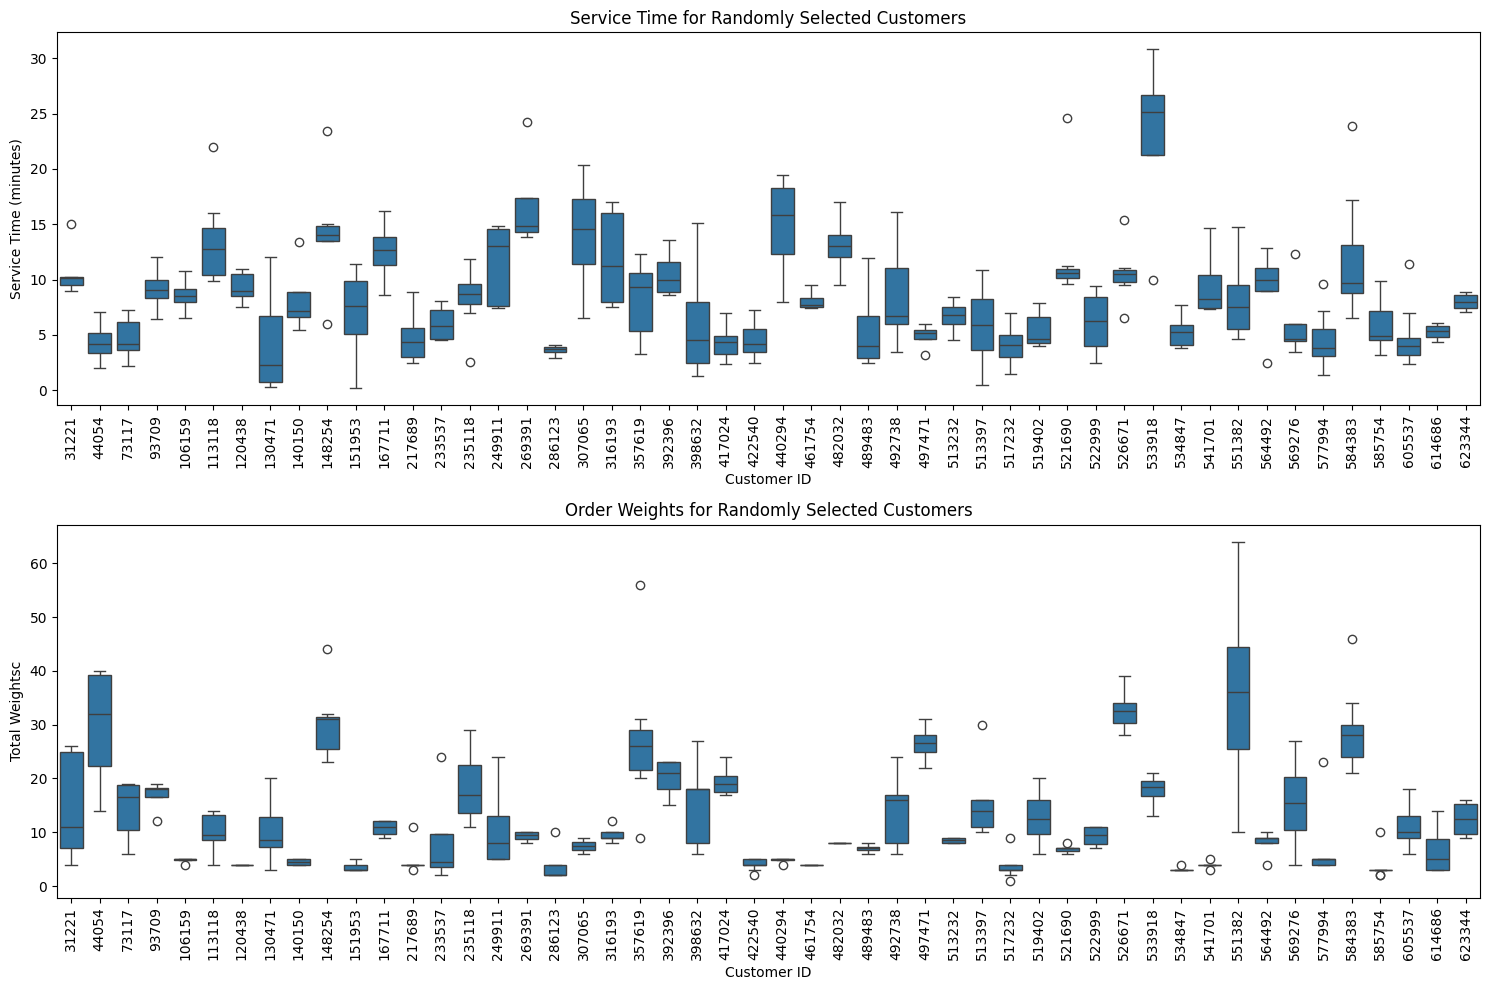

In [54]:
import random
rnd=random.Random()
rnd.seed(60)
rnd_num=rnd.randint(0,1000)
# Select 30 random customers from filtered_customers
random_customers = filtered_customers1.sample(n=50, random_state=rnd_num)

# Merge with the original dataframe to get service time data
merged_df = pd.merge(random_customers, df, on='customer_id_x')

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

# Boxplot for service time
sns.boxplot(x='customer_id_x', y='service_time_in_minutes', data=merged_df, ax=ax[0])
ax[0].set_title('Service Time for Randomly Selected Customers')
ax[0].set_xlabel('Customer ID')
ax[0].set_ylabel('Service Time (minutes)')
ax[0].tick_params(axis='x', rotation=90)

# Bar plot for order count




# sns.boxplot(x='customer_id_x', y='distinct_box_id_count', data=merged_df, ax=ax[1])
# ax[1].set_title('Order Weights for Randomly Selected Customers')
# ax[1].set_xlabel('Customer ID')
# ax[1].set_ylabel('Total Weightsc')
# ax[1].tick_params(axis='x', rotation=90)
# Boxplot for order weights
sns.boxplot(x='customer_id_x', y='article_count', data=merged_df, ax=ax[1])
ax[1].set_title('Order Weights for Randomly Selected Customers')
ax[1].set_xlabel('Customer ID')
ax[1].set_ylabel('Total Weightsc')
ax[1].tick_params(axis='x', rotation=90)





plt.tight_layout()
plt.show()